
## Applying K Means on Tesla Stocks Dataset




### Dataset used is from Jan'2011 to Feb'2021 

### Importing Libraries

In [62]:
%matplotlib.inline
from sklearn.cluster import KMeans                  # Importing K Means
import sys
import numpy as np                                  # Used for array computing means performing mathematical operation
np.set_printoptions(threshold=sys.maxsize)

import warnings                                     # warnings imported
warnings.filter_warnings('ignore')

import pandas as pd                                 # Manipulation and analysis of data       
pd.describe_option('display')

import seaborn as sns                               # Used for make attractive and informative statistical graphics
from sklearn.preprocessing import MinMaxScaler      # Scales all the data features
from matplotlib import pyplot as plt                # Used for visualization of the data in 2-D graph


UsageError: Line magic function `%matplotlib.inline` not found.


### Reading CSV file

In [63]:
df=pd.read_csv("TSLA.csv") # read csv file and store an new variable as DataFrame
df # Display DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368000,5.400000,5.180000,5.324000,5.324000,6415000
1,2011-01-04,5.332000,5.390000,5.204000,5.334000,5.334000,5937000
2,2011-01-05,5.296000,5.380000,5.238000,5.366000,5.366000,7233500
3,2011-01-06,5.366000,5.600000,5.362000,5.576000,5.576000,10306000
4,2011-01-07,5.600000,5.716000,5.580000,5.648000,5.648000,11239500
...,...,...,...,...,...,...,...
2550,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37011700
2551,2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66397000
2552,2021-02-24,711.849976,745.000000,694.169983,742.020020,742.020020,36677100
2553,2021-02-25,726.150024,737.210022,670.580017,682.219971,682.219971,38619900


In [64]:
df.isnull().sum() # Checking NULL values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
df.info(0) # Check different datatypes and info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2555 non-null   object 
 1   Open       2555 non-null   float64
 2   High       2555 non-null   float64
 3   Low        2555 non-null   float64
 4   Close      2555 non-null   float64
 5   Adj Close  2555 non-null   float64
 6   Volume     2555 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.9+ KB


In [32]:
df.describe() # Check Mean, std, min-max and more

,Open,High,Low,Close,Adj Close,Volume
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03
mean,74.786992,76.428478,73.047134,74.870499,74.870499,3.299649e+07
std,130.652865,133.740159,127.228990,130.900431,130.900431,2.919566e+07
min,4.356000,4.454000,4.222000,4.366000,4.366000,1.198000e+06
25%,24.295000,24.954000,23.874000,24.319001,24.319001,1.373600e+07
50%,45.734001,46.341999,44.924000,45.666000,45.666000,2.597050e+07
75%,62.567001,63.395001,61.295000,62.460001,62.460001,4.209815e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


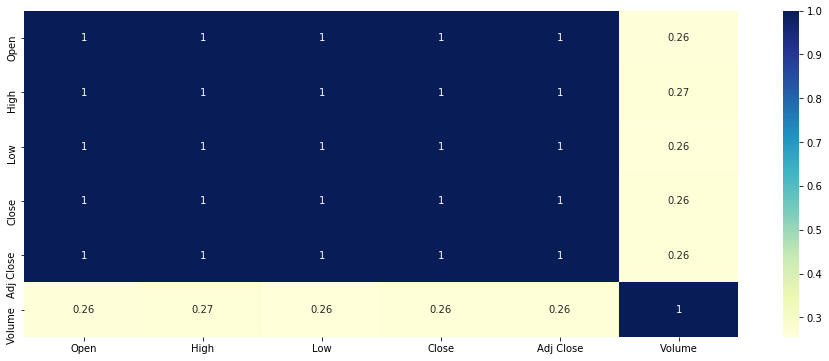

In [33]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

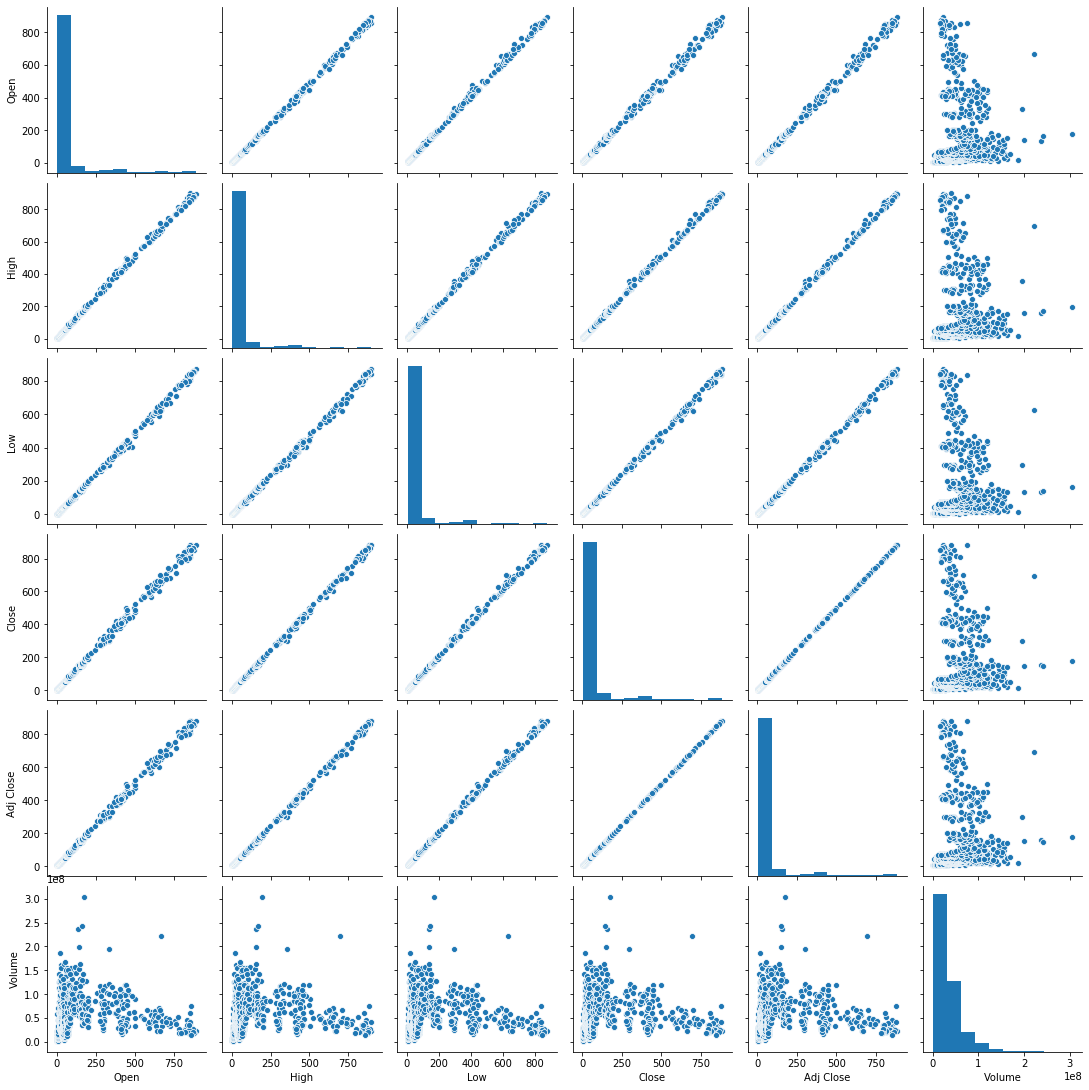

In [34]:
sns.pairplot(df) # Using Seaborn Library to see the relationship through scatter plot.

In [35]:
y = df.Volume

Text(0, 0.5, 'Volume(No. Of shares)')

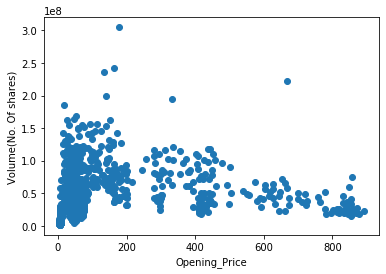

In [36]:
plt.scatter(df.Open,df['Volume'])
plt.xlabel('Opening_Price')
plt.ylabel('Volume(No. Of shares)')

### Using Elbow method to determine the Number of Clusters

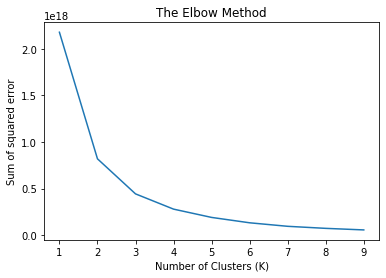

In [37]:
# Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Open','Volume']])
    sse.append(km.inertia_)
    
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#### From this we can predict that the number of clusters or the value of K will be 3

In [38]:
km = KMeans(n_clusters=3, random_state=3)
y_predicted = km.fit_predict(df[['Open', 'Volume']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
km.inertia_

4.426178523143668e+17

In [40]:
df['cluster'] = y_predicted
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,cluster
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000,0
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000,0
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500,0
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000,0
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500,0
5,2011-01-10,5.634,5.736,5.610,5.690,5.690,6713500,0
6,2011-01-11,5.718,5.742,5.384,5.392,5.392,8551000,0
7,2011-01-12,5.402,5.480,5.304,5.392,5.392,4822000,0
8,2011-01-13,5.392,5.394,5.232,5.244,5.244,3618000,0
9,2011-01-14,5.230,5.316,5.122,5.150,5.150,5960000,0


In [41]:
# to check cluster centers

km.cluster_centers_

array([[4.78949603e+01, 1.57070728e+07],
       [1.07358895e+02, 4.61160502e+07],
       [1.40800180e+02, 1.08405543e+08]])

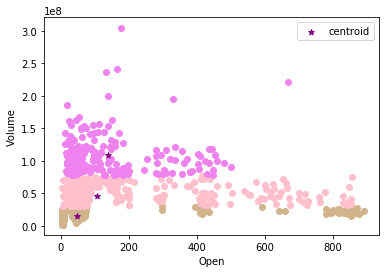

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Open,df1['Volume'],color='tan')
plt.scatter(df2.Open,df2['Volume'],color='pink')
plt.scatter(df3.Open,df3['Volume'],color='violet')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.legend()

### Presenting the Data in (0,1) range using Min Max Scaler

In [43]:
# we are scaling 
#Preprocessing using min max scaler
# min_max scaling convert all the values in the range 0-1
scaler = MinMaxScaler()

scaler.fit(df[['Volume']])
df['Volume'] = scaler.transform(df[['Volume']])

scaler.fit(df[['Open']])
df['Open'] = scaler.transform(df[['Open']])
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,cluster
0,2011-01-03,0.001141,5.400,5.180,5.324,5.324,0.017190,0
1,2011-01-04,0.001100,5.390,5.204,5.334,5.334,0.015615,0
2,2011-01-05,0.001060,5.380,5.238,5.366,5.366,0.019887,0
3,2011-01-06,0.001139,5.600,5.362,5.576,5.576,0.030010,0
4,2011-01-07,0.001402,5.716,5.580,5.648,5.648,0.033086,0
5,2011-01-10,0.001441,5.736,5.610,5.690,5.690,0.018173,0
6,2011-01-11,0.001535,5.742,5.384,5.392,5.392,0.024228,0
7,2011-01-12,0.001179,5.480,5.304,5.392,5.392,0.011941,0
8,2011-01-13,0.001168,5.394,5.232,5.244,5.244,0.007974,0
9,2011-01-14,0.000985,5.316,5.122,5.150,5.150,0.015690,0


In [52]:
df['cluster'] = y_predicted
y.value_counts()

44991000    2
4938000     2
4998500     2
20457000    2
28361500    2
           ..
67554000    1
40421100    1
8121000     1
49454000    1
2560000     1
Name: Volume, Length: 2531, dtype: int64

In [45]:
df.cluster.value_counts()

0    1513
1     842
2     200
Name: cluster, dtype: int64

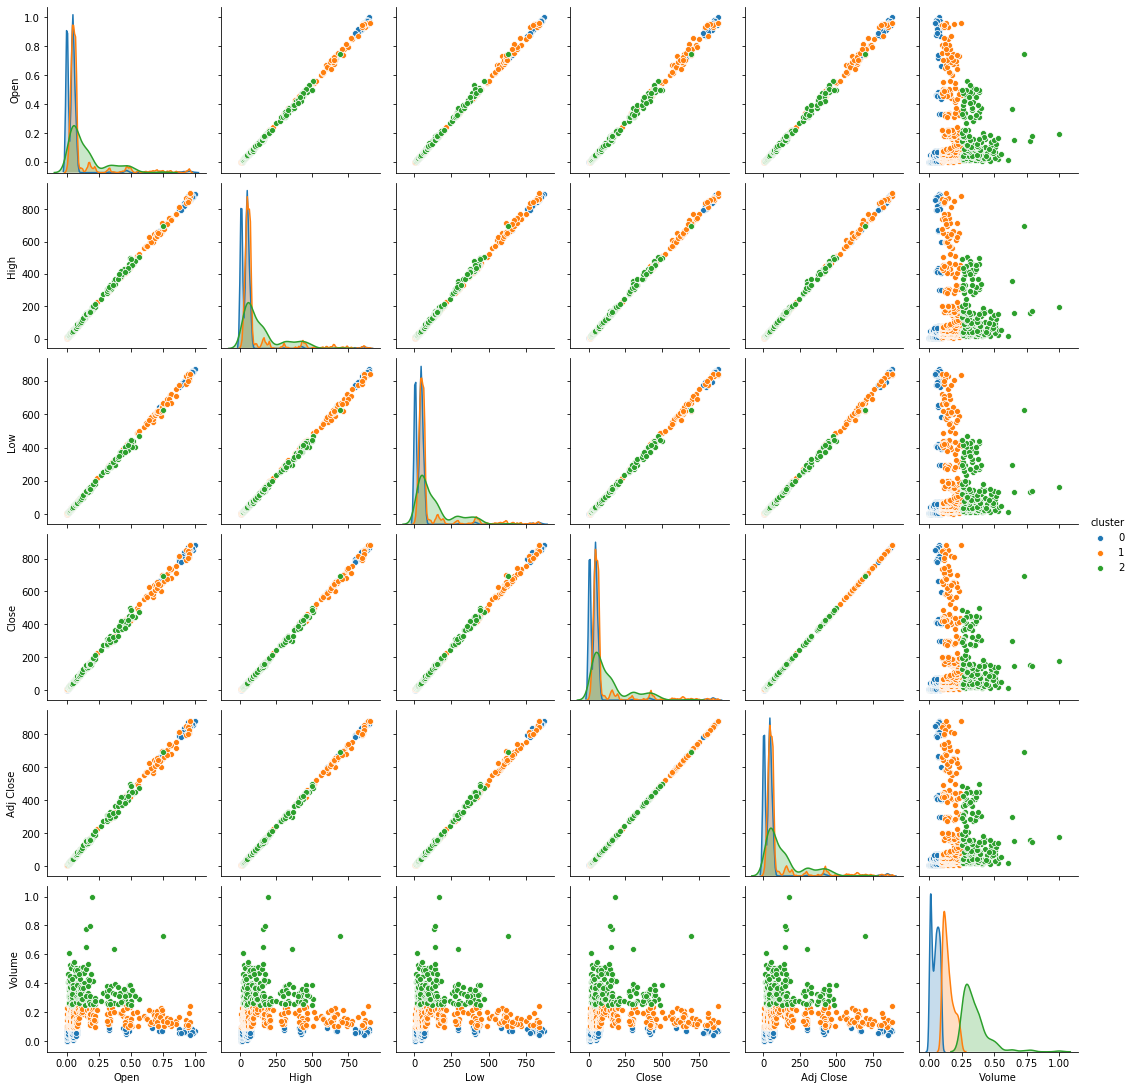

In [46]:
sns.pairplot(df, hue='cluster')

## Insights from the Data

### Cluster 0 -
#### Represents the highest count for the number of shares with respect to the Opening Price.

### Cluster 1 - 
#### Represents the average count for the number of shares with respect to the Opening Price.

### Cluster 2 - 
#### Represents the least count for the number of shares with respect to the Opening Price.

### Tesla shares rose a market-leading 743% in 2020, as investors embraced the idea that the future of the auto industry would be electric.